<a href="https://colab.research.google.com/github/sllpwlkr/Frameworks_7sem_Lupanova/blob/main/PSFII_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №3: Решающее дерево

## Задача классификации

### 2. Создание бейзлайна и оценка качества

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Загрузка данных
df = pd.read_csv('apple_quality.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [4]:
#Предобработка данных
print(df.head(1))
print(df.describe())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336    5.34633    -1.012009     1.8449   0.32984   

        Acidity Quality  
0  -0.491590483    good  
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.8

In [5]:
#Проверяем общее количество пропусков
total_missing = df.isnull().sum().sum()
print(f"Всего пропущенных значенийй: {total_missing}")

#Удаление строк с пропущенными значениями
initial_rows = len(df)
df_clean = df.dropna()
rows_after_cleaning = len(df_clean)
rows_removed = initial_rows - rows_after_cleaning

print(f"\nКоличество строк до удаления пропусков: {initial_rows}")
print(f"Удалено строк с пропущенными значениями: {rows_removed}")

#Сохраняем очищенный df
df = df_clean.copy()

Всего пропущенных значенийй: 8

Количество строк до удаления пропусков: 4001
Удалено строк с пропущенными значениями: 1


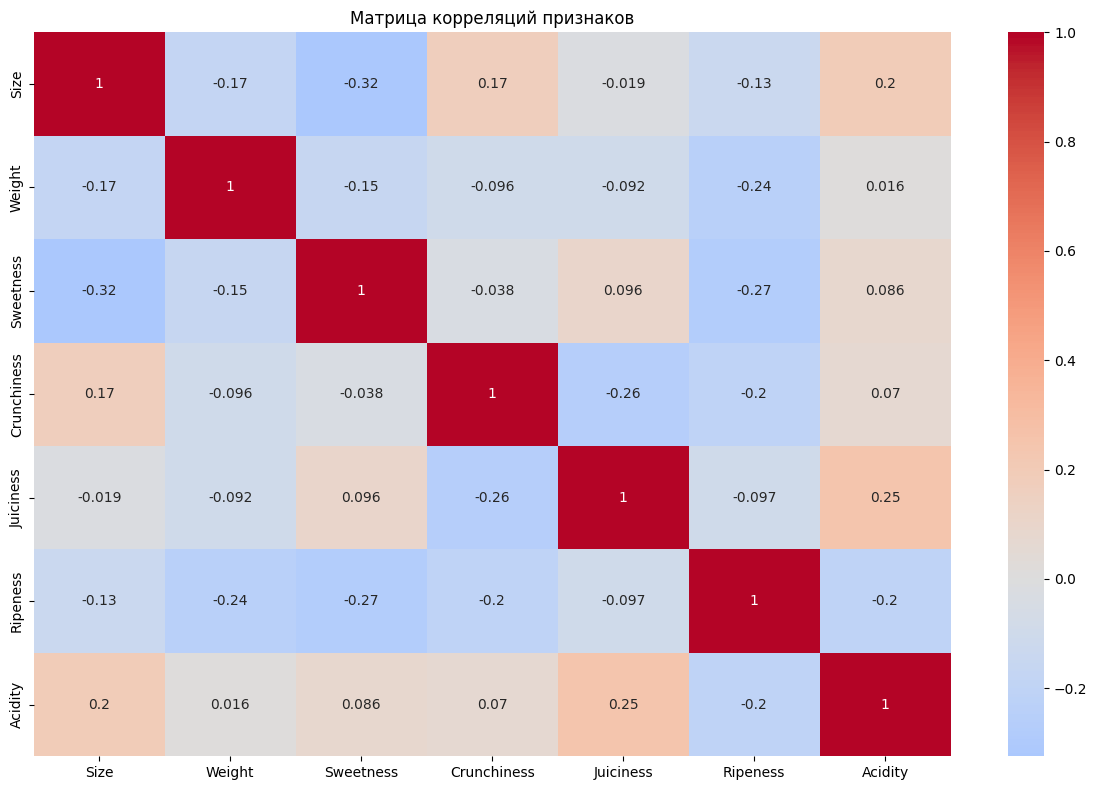

In [6]:
#Матрица корреляций
plt.figure(figsize=(12, 8))
numeric_df = df.drop(['A_id', 'Quality'], axis=1)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций признаков')
plt.tight_layout()
plt.show()

In [7]:
#Проверим баланс классов
print(df['Quality'].value_counts())

Quality
good    2004
bad     1996
Name: count, dtype: int64


In [8]:
#Преобразуем целевую переменную из категориального в чиловой признак
le = LabelEncoder()
df['Quality_encoded'] = le.fit_transform(df['Quality'])
print(f"\nКодирование классов: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Кодирование классов: {'bad': np.int64(0), 'good': np.int64(1)}


In [9]:
#Удаляем колонку с id и разделяем датасет на фичи и целевую переменную
X = df.drop(['A_id', 'Quality', 'Quality_encoded'], axis=1)
y = df['Quality_encoded']

In [10]:
#Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
#Бейзлайн модель и предсказания
base_model = DecisionTreeClassifier()
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)


DecisionTree Baseline:
Accuracy: 0.8025
Precision: 0.8043
Recall: 0.8025
F1-score: 0.8022


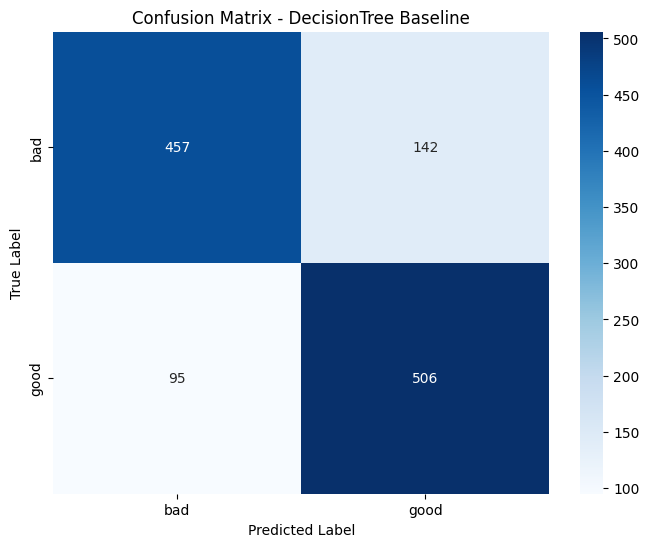

In [12]:
#Оценка качества
def evaluate_model(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
base_metrics = evaluate_model(y_test, y_pred, "DecisionTree Baseline")

### 3. Улучшение бейзлайна

Гипотеза 1: масштабирование признаков

Гипотеза 2: подбор гиперпараметров модели

Гипотеза 3: создание новых полиномиальных признаков

Гипотеза 4: удаление выбросов

In [13]:
#Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Модель с масштабированными признаками
model_scaled = DecisionTreeClassifier()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

In [14]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_scaled):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_scaled):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_scaled):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_scaled):.4f}")

Accuracy: 0.8008
Precision: 0.7759
Recall: 0.8469
F1-score: 0.8099


После масштабирования данных модель стала хуже предсказывать положительный класс (bad apple)

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [16]:
print(f"\nРазмерность данных до полиномиального преобразования: {X_train.shape}")
print(f"Размерность данных после полиномиального преобразования: {X_train_poly.shape}")


Размерность данных до полиномиального преобразования: (2800, 7)
Размерность данных после полиномиального преобразования: (2800, 35)


In [17]:
#Модель с полиномиальными признаками
model_new_features = DecisionTreeClassifier()
model_new_features.fit(X_train_poly, y_train)
y_pred_new_features = model_new_features.predict(X_test_poly)

In [18]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_new_features):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_new_features):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_new_features):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_new_features):.4f}")

Accuracy: 0.7975
Precision: 0.7934
Recall: 0.8053
F1-score: 0.7993


Добавление полиномиальных признаков не привело к улучшению модели по сравнению с baseline. Новые признаки не несут дополнительной полезной информации.

In [20]:
#Подбор гиперпараметров с кросс-валидацией
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='f1', verbose=1)

In [21]:
print("\nЛучшие параметры:", grid_search.best_params_)
print(f"Лучший F1-score на кросс-валидации: {grid_search.best_score_:.4f}")


Лучшие параметры: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 5}
Лучший F1-score на кросс-валидации: 0.8149



DecisionTree impoved:
Accuracy: 0.8008
Precision: 0.8009
Recall: 0.8008
F1-score: 0.8008


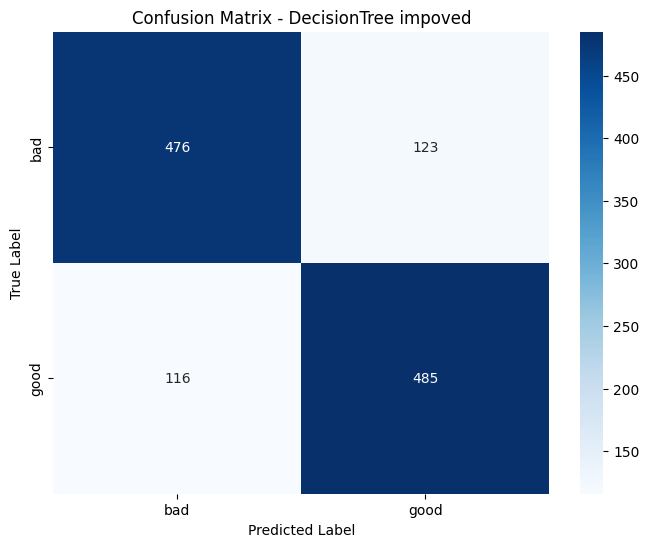

In [27]:
#Модель с гипер параметрами
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


improved_metrics = evaluate_model(y_test, y_pred_best,"DecisionTree impoved")

In [28]:
#Сравнение базовой и улучшенной моделей
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Base Model': [
        base_metrics['accuracy'],
        base_metrics['precision'],
        base_metrics['recall'],
        base_metrics['f1']
    ],
    'Improved Model': [
        improved_metrics['accuracy'],
        improved_metrics['precision'],
        improved_metrics['recall'],
        improved_metrics['f1']
    ]
})
print(comparison)

      Metric  Base Model  Improved Model
0   Accuracy    0.802500        0.800833
1  Precision    0.804342        0.800870
2     Recall    0.802500        0.800833
3   F1-Score    0.802184        0.800825


Улучшенная модель стабильно уступает бейзлайну по всем метрикам примерно на 1%

### 4.	Имплементация алгоритма машинного обучения

In [30]:
#Кастомная реализация решающего дерева для классификации
class CustomDecisionTree:

    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion = 'gini'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.tree = None
        self.feature_importances_ = None

    #Вычисление коэффициента Джини
    def _gini(self, y):

        if len(y) == 0:
            return 0
        p = np.sum(y) / len(y)
        return 1 - p**2 - (1-p)**2

    #Вычисление энтропии
    def _entropy(self, y):
        if len(y) == 0:
            return 0
        p = np.sum(y) / len(y)
        if p == 0 or p == 1:
            return 0
        return -p * np.log2(p) - (1-p) * np.log2(1-p)

    def _information_gain(self, y, y_left, y_right):
            if self.criterion == 'gini':
                parent_impurity = self._gini(y)
                left_impurity = self._gini(y_left)
                right_impurity = self._gini(y_right)
            else:  # entropy
                parent_impurity = self._entropy(y)
                left_impurity = self._entropy(y_left)
                right_impurity = self._entropy(y_right)

            n = len(y)
            n_left = len(y_left)
            n_right = len(y_right)

            gain = parent_impurity - (n_left/n) * left_impurity - (n_right/n) * right_impurity
            return gain
    #Поиск наилучшего разделения
    def _find_best_split(self, X, y):
        best_gain = 0
        best_split = None

        n_samples, n_features = X.shape

        for feature_idx in range(n_features):
            #Уникальные значения признака
            feature_values = np.unique(X[:, feature_idx])

            for threshold in feature_values:
                #Разделение на левую и правую части
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue

                #Вычисление информационного выигрыша
                gain = self._information_gain(y, y[left_mask], y[right_mask])

                if gain > best_gain:
                    best_gain = gain
                    best_split = {
                        'feature_idx': feature_idx,
                        'threshold': threshold,
                        'gain': gain
                    }

        return best_split
    #Рекурсивное построение дерева
    def _build_tree(self, X, y, depth=0):
        n_samples = len(y)

        #Критерии остановки
        if (self.max_depth is not None and depth >= self.max_depth or
            n_samples < self.min_samples_split or
            len(np.unique(y)) == 1):

            #Листовой узел - возвращаем наиболее частый класс
            unique, counts = np.unique(y, return_counts=True)
            return {
                'is_leaf': True,
                'class': unique[np.argmax(counts)],
                'samples': n_samples
            }

        #Поиск наилучшего разделения
        split = self._find_best_split(X, y)

        if split is None or split['gain'] == 0:
            #Не удалось найти хорошее разделение
            unique, counts = np.unique(y, return_counts=True)
            return {
                'is_leaf': True,
                'class': unique[np.argmax(counts)],
                'samples': n_samples
            }

        #Разделение данных
        left_mask = X[:, split['feature_idx']] <= split['threshold']
        right_mask = ~left_mask

        #Рекурсивное построение левого и правого поддеревьев
        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'is_leaf': False,
            'feature_idx': split['feature_idx'],
            'threshold': split['threshold'],
            'gain': split['gain'],
            'left': left_subtree,
            'right': right_subtree,
            'samples': n_samples
        }

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        self.tree = self._build_tree(X, y)

        #Вычисление важности признаков
        self._compute_feature_importance(X.shape[1])

        return self

    #Для предсказания одного образца
    def _predict_one(self, x, node):
        if node['is_leaf']:
            return node['class']

        if x[node['feature_idx']] <= node['threshold']:
            return self._predict_one(x, node['left'])
        else:
            return self._predict_one(x, node['right'])

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for i in range(len(X)):
            predictions.append(self._predict_one(X[i], self.tree))
        return np.array(predictions)

   #Вычисление важности признаков
    def _compute_feature_importance(self, n_features):
        importances = np.zeros(n_features)
        total_samples = self.tree['samples']

        def traverse(node):
            if not node['is_leaf']:
                #Важность признака пропорциональна выигрышу * доля образцов
                importances[node['feature_idx']] += node['gain'] * (node['samples'] / total_samples)
                traverse(node['left'])
                traverse(node['right'])

        traverse(self.tree)
        self.feature_importances_ = importances / np.sum(importances) if np.sum(importances) > 0 else importances

In [31]:
#Обучение и предсказание кастомной модели
custom_tree = CustomDecisionTree()
custom_tree.fit(X_train, y_train)

y_pred_custom = custom_tree.predict(X_test)


DecisionTree Custom:
Accuracy: 0.7875
Precision: 0.7885
Recall: 0.7875
F1-score: 0.7873


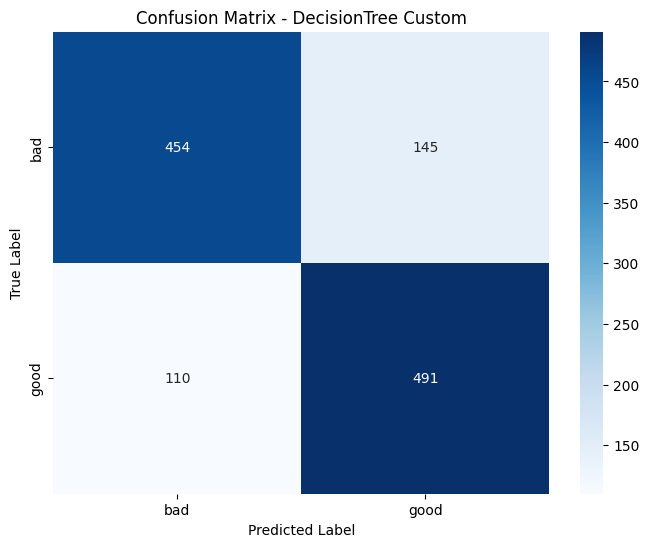

In [32]:
#Оценка качества
custom_metrics = evaluate_model(y_test, y_pred_custom, "DecisionTree Custom")

In [33]:
#Применяем лучшие гиперпараметры из GridSearch к кастомной модели
custom_improved_tree = CustomDecisionTree(criterion = 'gini', max_depth = 10, min_samples_leaf = 6, min_samples_split = 5 )
custom_improved_tree.fit(X_train, y_train)

y_pred_improved_custom= custom_improved_tree.predict(X_test)


DecisionTree Improved Custom:
Accuracy: 0.8000
Precision: 0.8001
Recall: 0.8000
F1-score: 0.8000


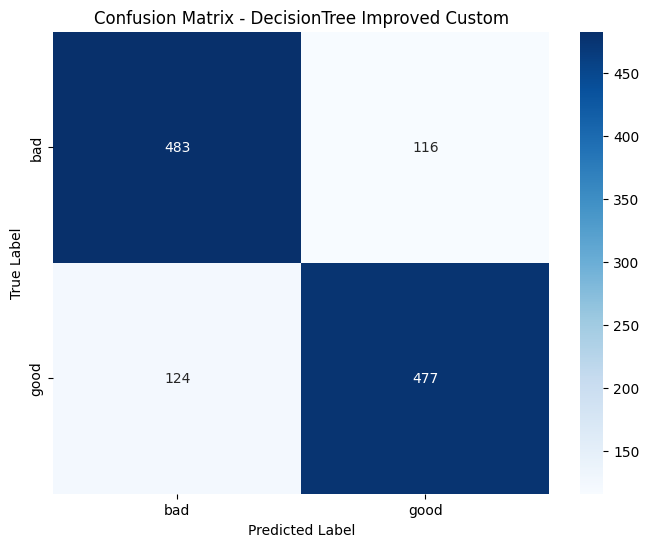

In [34]:
#Оценка качества
custom_impoved_metrics = evaluate_model(y_test, y_pred_improved_custom, "DecisionTree Improved Custom")

In [35]:
#Сравнение всех метрик всех моделей
comparison_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Baseline DecisionTree': [
        base_metrics['accuracy'],
        base_metrics['precision'],
        base_metrics['recall'],
        base_metrics['f1']
    ],
    'Improved DecisionTree': [
        improved_metrics['accuracy'],
        improved_metrics['precision'],
        improved_metrics['recall'],
        improved_metrics['f1']
    ],
    'Custom DecisionTree': [
        custom_metrics['accuracy'],
        custom_metrics['precision'],
        custom_metrics['recall'],
        custom_metrics['f1']
    ],
    'Custom Improved DecisionTree': [
        custom_impoved_metrics['accuracy'],
        custom_impoved_metrics['precision'],
        custom_impoved_metrics['recall'],
        custom_impoved_metrics['f1']
    ]
})

print(comparison_metrics.to_string(index=False))

   Metric  Baseline DecisionTree  Improved DecisionTree  Custom DecisionTree  Custom Improved DecisionTree
 Accuracy               0.802500               0.800833             0.787500                      0.800000
Precision               0.804342               0.800870             0.788461                      0.800058
   Recall               0.802500               0.800833             0.787500                      0.800000
 F1-score               0.802184               0.800825             0.787309                      0.799993


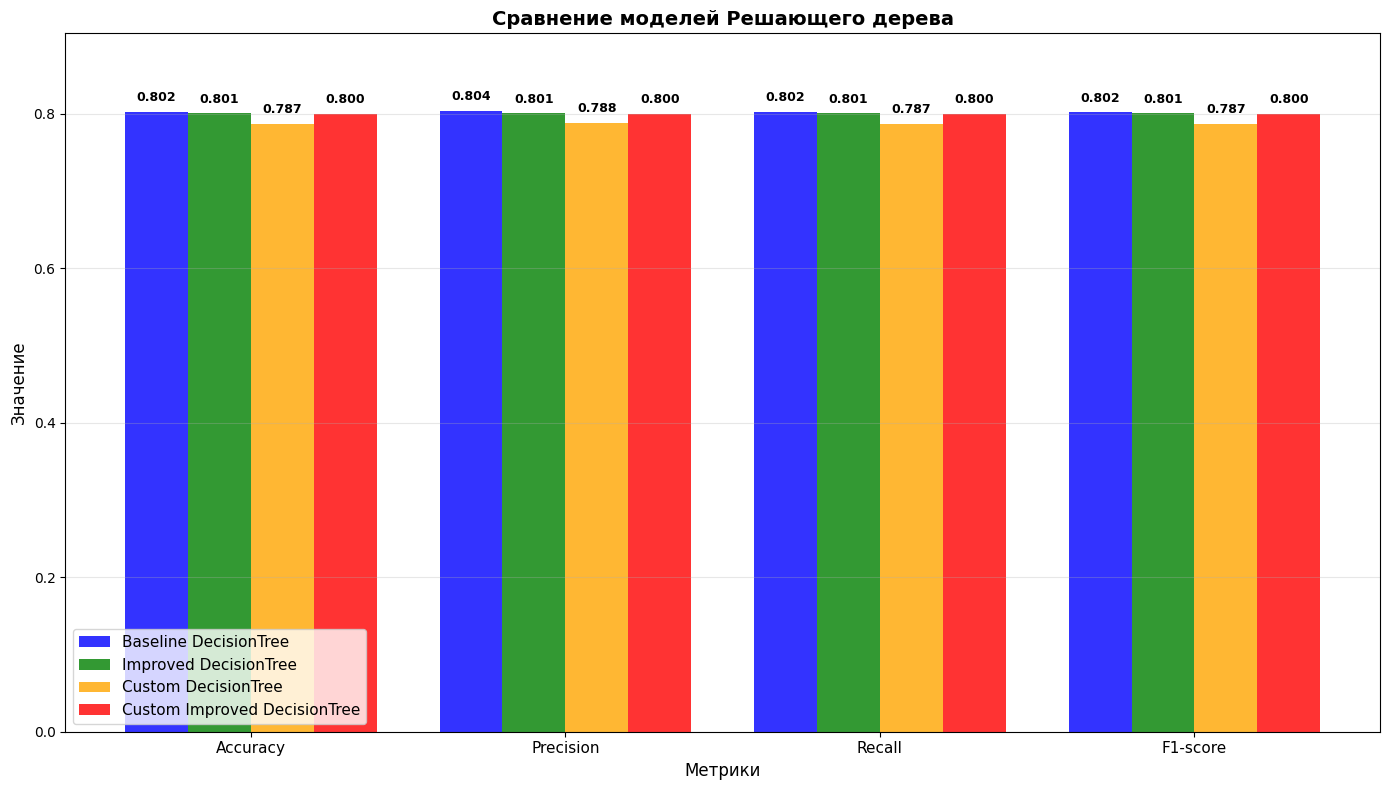

In [36]:
#Визуализация сравнения
plt.figure(figsize=(14, 8))
x = np.arange(len(comparison_metrics))
width = 0.2

plt.bar(x - width*1.5, comparison_metrics['Baseline DecisionTree'], width,
        label='Baseline DecisionTree', alpha=0.8, color='blue')
plt.bar(x - width/2, comparison_metrics['Improved DecisionTree'], width,
        label='Improved DecisionTree', alpha=0.8, color='green')
plt.bar(x + width/2, comparison_metrics['Custom DecisionTree'], width,
        label='Custom DecisionTree', alpha=0.8, color='orange')
plt.bar(x + width*1.5, comparison_metrics['Custom Improved DecisionTree'], width,
        label='Custom Improved DecisionTree', alpha=0.8, color='red')

plt.xlabel('Метрики', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.title('Сравнение моделей Решающего дерева', fontsize=14, fontweight='bold')
plt.xticks(x, comparison_metrics['Metric'], fontsize=11)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

#Добавляем значения над столбцами
for i in range(len(comparison_metrics)):
    plt.text(i - width*1.5, comparison_metrics['Baseline DecisionTree'][i] + 0.01,
             f'{comparison_metrics["Baseline DecisionTree"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i - width/2, comparison_metrics['Improved DecisionTree'][i] + 0.01,
             f'{comparison_metrics["Improved DecisionTree"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i + width/2, comparison_metrics['Custom DecisionTree'][i] + 0.01,
             f'{comparison_metrics["Custom DecisionTree"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i + width*1.5, comparison_metrics['Custom Improved DecisionTree'][i] + 0.01,
             f'{comparison_metrics["Custom Improved DecisionTree"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Настраиваем пределы оси Y
max_val = max([comparison_metrics['Baseline DecisionTree'].max(), comparison_metrics['Improved DecisionTree'].max(), comparison_metrics['Custom DecisionTree'].max(), comparison_metrics['Custom Improved DecisionTree'].max()]) + 0.1
plt.ylim(0, min(max_val, 1.0))

plt.tight_layout()
plt.show()

Custom Decision Tree в базовой версии отстает от библиотечных аналогов на 1-2%, но после оптимизации достигает уровня улучшенной библиотечной модели, демонстрируя корректность реализации.

Improved Decision Tree показала незначительное снижение точности (80.08%) по сравнению с Baseline Decision Tree (80.25%), что указывает на неэффективность примененных улучшений.

## Задача регресии

### 2. Создание бейзлайна и оценка качества

### 3. Улучшение бейзлайна

### 4.	Имплементация алгоритма машинного обучения